## TIDY DATA PROJECT
Brynn Wilary

In [33]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## STEP 1: LOAD DATA FRAME
This step utilizes the pandas read_csv method to turn the data into a data frame.

In [34]:
olympic_df = pd.read_csv("2008_medalist_data.csv")
#print untidy data
print("Olympic 2008 Medals Untidy")
print(olympic_df)

Olympic 2008 Medals Untidy
          medalist_name male_archery female_archery male_athletics  \
0       Aaron Armstrong          NaN            NaN           gold   
1         Aaron Peirsol          NaN            NaN            NaN   
2      Abdullo Tangriev          NaN            NaN            NaN   
3     Abeer Abdelrahman          NaN            NaN            NaN   
4               Abhinav          NaN            NaN            NaN   
...                 ...          ...            ...            ...   
1870        Éver Banega          NaN            NaN            NaN   
1871  Ólafur Stefánsson          NaN            NaN            NaN   
1872      Óscar Brayson          NaN            NaN            NaN   
1873   Łukasz Pawłowski          NaN            NaN            NaN   
1874        Živko Gocić          NaN            NaN            NaN   

     female_athletics male_badminton female_badminton male_baseball  \
0                 NaN            NaN              NaN        

## STEP 2: MELTED FORM
In order to make the data cleaner and easier to be manipulated and transformed, it must be switched into the tidy and long form. NaN values must also be removed for the data to be best to work with.

In [35]:
df_olympic_melted = olympic_df.melt(id_vars=["medalist_name"], var_name="sport_gender", value_name="medal")
# Drop NaN values where no medals were received
df_olympic_melted = df_olympic_melted.dropna()
print("Olympic 2008 Medals Tidy and NaN Dropped")
print(df_olympic_melted)

Olympic 2008 Medals Tidy and NaN Dropped
              medalist_name                sport_gender   medal
177            Bair Badënov                male_archery  bronze
676           Ilario Di Buò                male_archery  silver
682            Im Dong-hyun                male_archery    gold
760               Jiang Lin                male_archery  bronze
920          Lee Chang-hwan                male_archery    gold
...                     ...                         ...     ...
130932        Steeve Guénot  male_greco-roman wrestling    gold
131159  Yannick Szczepaniak  male_greco-roman wrestling  bronze
131162       Yavor Yanakiev  male_greco-roman wrestling  bronze
131200      Yury Patrikeyev  male_greco-roman wrestling  bronze
131234         Zoltán Fodor  male_greco-roman wrestling  silver

[1875 rows x 3 columns]


## STEP 3: SEPARATE SPORT AND GENDER
The 2008 Olympic Medalist Data is currently difficult to work with because the sport and gender terms are combined. This greatly limits the transformation possibilities, and must be separated. By using str.split, we can split apart the sport and gender and look at each individually. This is critical for our data analysis, and works to separate each at the underscore. Then, dashes must be taken out of the sport names and replaced by a space using the str.replace function. Finally, the str.title() function is used to maintain consistent capitalization throughout the data.


In [36]:
df_olympic_melted[['gender', 'sport']] = df_olympic_melted['sport_gender'].str.split(pat="_",expand = True)
# Remove any extra spaces in sport names
df_olympic_melted['gender'] = df_olympic_melted['gender'].str.title()
df_olympic_melted['medal'] = df_olympic_melted['medal'].str.title()
df_olympic_melted['medalist_name'] = df_olympic_melted['medalist_name'].str.title()
df_olympic_melted['sport'] = df_olympic_melted['sport'].str.replace('_', ' ').str.title()
print("Olympic 2008 Medals Sports and Gender")
print(df_olympic_melted)

Olympic 2008 Medals Sports and Gender
              medalist_name                sport_gender   medal gender  \
177            Bair Badënov                male_archery  Bronze   Male   
676           Ilario Di Buò                male_archery  Silver   Male   
682            Im Dong-Hyun                male_archery    Gold   Male   
760               Jiang Lin                male_archery  Bronze   Male   
920          Lee Chang-Hwan                male_archery    Gold   Male   
...                     ...                         ...     ...    ...   
130932        Steeve Guénot  male_greco-roman wrestling    Gold   Male   
131159  Yannick Szczepaniak  male_greco-roman wrestling  Bronze   Male   
131162       Yavor Yanakiev  male_greco-roman wrestling  Bronze   Male   
131200      Yury Patrikeyev  male_greco-roman wrestling  Bronze   Male   
131234         Zoltán Fodor  male_greco-roman wrestling  Silver   Male   

                        sport  
177                   Archery  
676      

## STEP 4: CREATE PIVOT TABLE
This pivot table was created to demonstrate an aggregation of the medal count for each gender indexed by sport. By counting the medals, one gains numeric information that one can work with and create additional insights from.

In [37]:
# Pivot table looking at medals, using sport as an index and gender as a column
medal_gender_pivot = pd.pivot_table(df_olympic_melted, values='medal', index='sport', columns='gender', aggfunc='count',fill_value=0)
print("\nPivot Table by Medal and Gender")
print(medal_gender_pivot)


Pivot Table by Medal and Gender
gender                 Female  Male
sport                              
Archery                     9    11
Artistic Gymnastics        20    29
Association Football       54    55
Athletics                  81    85
Badminton                  10    12
Baseball                    0    72
Basketball                 36    35
Beach Volleyball            6     6
Bmx                         3     3
Boxing                      0    44
Canoeing And Kayaking      21    53
Diving                     13    16
Equestrian Sport           20    18
Fencing                    26    28
Field Hockey               48    50
Freestyle Wrestling        16    28
Greco-Roman Wrestling       0    27
Handball                   42    43
Judo                       28    28
Modern Pentathlon           2     3
Mountain Biking             3     3
Rhythmic Gymnastics        21     0
Road Bicycle Racing         6     5
Rowing                     58    83
Sailing                    21  

## STEP 5: MEDAL ANALYSIS
I wanted to look further into the medal count. The groupby method allows one to group each sport by its medals, and then counts the number of medals. The ascending=False allowed it to be sort from highest to lowest. This can be used for future plots.

In [38]:
df_medal_counts = df_olympic_melted.groupby("sport")['medal'].count().reset_index()
df_medal_counts = df_medal_counts.sort_values(by='medal', ascending=False)
print("Sorted Olympic 2008 Medals by Sport")
print(df_medal_counts)

Sorted Olympic 2008 Medals by Sport
                    sport  medal
3               Athletics    166
23                 Rowing    141
27               Swimming    125
2    Association Football    109
14           Field Hockey     98
17               Handball     85
36             Water Polo     78
10  Canoeing And Kayaking     74
5                Baseball     72
35             Volleyball     72
6              Basketball     71
18                   Judo     56
24                Sailing     54
13                Fencing     54
1     Artistic Gymnastics     49
26               Softball     45
37          Weightlifting     45
15    Freestyle Wrestling     44
32          Track Cycling     44
9                  Boxing     44
25         Shooting Sport     43
12       Equestrian Sport     38
30              Taekwondo     32
28  Synchronized Swimming     29
11                 Diving     29
16  Greco-Roman Wrestling     27
4               Badminton     22
21    Rhythmic Gymnastics     21
0      

## STEP 6: VISUAL DATA CORRELATIONS
This step is essential in creating visual aids to better show the data correlations and distribution. To do this, I evaluated different relevant pieces of information to see visual data patterns. First, I wanted to see the top 10 sports had the most medals. This is important as it impacts the further breakdown and shows which sports have the most medals to be earned. I used a bar plot to show this. I also wanted to see the medal distribution by gender. To do this, I used a stacked bar chart to show the various different comparisons.

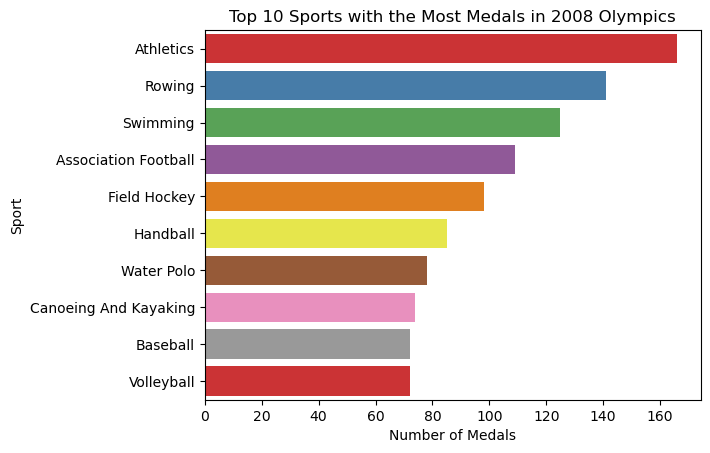

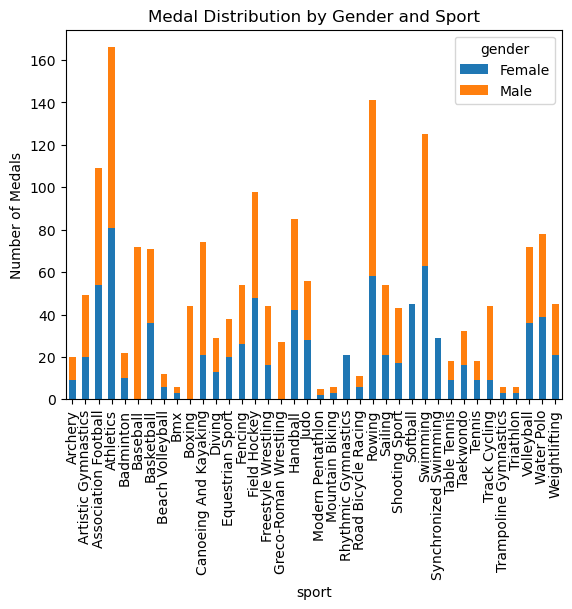

In [39]:
# Create a bar plot to see the top 10 sports with the most medals
plt.figure()
sns.barplot(x='medal', y='sport', data=df_medal_counts.head(10),palette="Set1",hue='sport')
plt.xlabel("Number of Medals")
plt.ylabel("Sport")
plt.title("Top 10 Sports with the Most Medals in 2008 Olympics")
#plt.show()

# Makes a bar chart that shows each sport by gender and medal count
medal_gender_pivot.plot(kind='bar', stacked=True)
plt.ylabel("Number of Medals")
plt.title("Medal Distribution by Gender and Sport")
plt.show()